# <span style=color:darkblue>04 projecte datascience-k-means</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from mpl_toolkits.mplot3d import Axes3D

#Normalització
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer

#K-means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

#PCA
from sklearn.decomposition import PCA

#kneed, to identify the elbow point programmatically
from kneed import KneeLocator

import warnings
warnings.filterwarnings('ignore')

## <span style=color:darkblue>DataFrame tots el moviments finanacers més attributs</span>

In [2]:
df = pd.read_csv('.\\datasets_definitius\\df_finance_attributs_all.csv')

In [3]:
df = df.drop(['Unnamed: 0'], axis=1)

In [4]:
df.describe()

,id,rarity,amount_eth,adj_close,Num_venta,Redimiento,Year,Month,YearMonth,idpunks,...,Tassle Hat,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair,Wild White Hair
count,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,...,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000
mean,5506.306785,0.100973,14.611954,1197.354675,1.083718,36.115634,2019.979831,5.019165,15.959690,5506.306785,...,0.004619,0.001521,0.003414,0.011390,0.008062,0.008119,0.002037,0.002668,0.015608,0.003472
std,2652.762722,0.043717,51.477596,974.235314,1.388433,306.463095,1.329693,3.125331,8.375266,2652.762722,...,0.067808,0.038966,0.058332,0.106116,0.089427,0.089742,0.045088,0.051586,0.123953,0.058818
min,1.000000,0.000200,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3258.000000,0.061466,0.600000,272.692000,0.000000,0.000000,2019.000000,2.000000,9.000000,3258.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5565.000000,0.103943,6.480000,1224.200000,1.000000,0.826673,2021.000000,4.000000,16.000000,5565.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7819.000000,0.119104,21.990000,1848.460000,2.000000,1.975408,2021.000000,7.000000,23.000000,7819.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9998.000000,0.681778,4200.000000,4168.700000,12.000000,25195.513196,2021.000000,12.000000,31.000000,9998.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df

,id,type_x,rarity,amount_eth,adj_close,Num_venta,Redimiento,Year,Month,YearMonth,...,Tassle Hat,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair,Wild White Hair
0,1,Male,0.094547,60.00,614.843,2,7.171077,2020,11,30,...,0,0,0,0,0,0,0,0,0,0
1,1,Male,0.094547,60.00,614.843,2,7.171077,2020,11,30,...,0,0,0,0,0,0,0,0,0,0
2,1,Male,0.094547,31.00,165.947,1,44.917140,2019,4,6,...,0,0,0,0,0,0,0,0,0,0
3,1,Male,0.094547,31.00,165.947,1,44.917140,2019,4,6,...,0,0,0,0,0,0,0,0,0,0
4,1,Male,0.094547,0.42,272.692,0,0.000000,2017,6,26,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34850,9998,Female,0.054166,38.00,1575.850,1,5.848119,2021,3,3,...,0,0,0,0,0,0,0,0,0,0
34851,9998,Female,0.054166,38.00,1575.850,1,5.848119,2021,3,3,...,0,0,0,0,0,0,0,0,0,0
34852,9998,Female,0.054166,15.00,682.642,0,0.000000,2020,12,27,...,0,0,0,0,0,0,0,0,0,1
34853,9998,Female,0.054166,15.00,682.642,0,0.000000,2020,12,27,...,0,0,0,0,0,0,0,0,0,0


### <span style=color:darkred>labelencoder</span>

In [6]:
labelencoder = LabelEncoder()

In [7]:
df['type_le'] = labelencoder.fit_transform(df['type_x'])

In [8]:
#Reorganizar columans DataFrame
df = df[['id',
 'type_x',
 'type_le',
'Redimiento',
 'rarity',
 'amount_eth',
 'adj_close',
 'Num_venta',
 '3D Glasses',
 'Bandana',
 'Beanie',
 'Big Beard',
 'Big Shades',
 'Black Lipstick',
 'Blonde Bob',
 'Blonde Short',
 'Blue Eye Shadow',
 'Buck Teeth',
 'Cap',
 'Cap Forward',
 'Chinstrap',
 'Choker',
 'Cigarette',
 'Classic Shades',
 'Clown Eyes Blue',
 'Clown Eyes Green',
 'Clown Hair Green',
 'Clown Nose',
 'Cowboy Hat',
 'Crazy Hair',
 'Dark Hair',
 'Do-rag',
 'Earring',
 'Eye Mask',
 'Eye Patch',
 'Fedora',
 'Front Beard',
 'Front Beard Dark',
 'Frown',
 'Frumpy Hair',
 'Goat',
 'Gold Chain',
 'Green Eye Shadow',
 'Half Shaved',
 'Handlebars',
 'Headband',
 'Hoodie',
 'Horned Rim Glasses',
 'Hot Lipstick',
 'Knitted Cap',
 'Luxurious Beard',
 'Medical Mask',
 'Messy Hair',
 'Mohawk',
 'Mohawk Dark',
 'Mohawk Thin',
 'Mole',
 'Mustache',
 'Muttonchops',
 'Nerd Glasses',
 'Normal Beard',
 'Normal Beard Black',
 'Orange Side',
 'Peak Spike',
 'Pigtails',
 'Pilot Helmet',
 'Pink With Hat',
 'Pipe',
 'Police Cap',
 'Purple Eye Shadow',
 'Purple Hair',
 'Purple Lipstick',
 'Red Mohawk',
 'Regular Shades',
 'Rosy Cheeks',
 'Shadow Beard',
 'Shaved Head',
 'Silver Chain',
 'Small Shades',
 'Smile',
 'Spots',
 'Straight Hair',
 'Straight Hair Blonde',
 'Straight Hair Dark',
 'Stringy Hair',
 'Tassle Hat',
 'Tiara',
 'Top Hat',
 'VR',
 'Vampire Hair',
 'Vape',
 'Welding Goggles',
 'Wild Blonde',
 'Wild Hair',
 'Wild White Hair']]

### <span style=color:darkred>Normalitzar les dades</span>

In [9]:
df.type_le.unique()

array([3, 2, 4, 1, 0])

In [10]:
df

,id,type_x,type_le,Redimiento,rarity,amount_eth,adj_close,Num_venta,3D Glasses,Bandana,...,Tassle Hat,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair,Wild White Hair
0,1,Male,3,7.171077,0.094547,60.00,614.843,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Male,3,7.171077,0.094547,60.00,614.843,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,Male,3,44.917140,0.094547,31.00,165.947,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,Male,3,44.917140,0.094547,31.00,165.947,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,Male,3,0.000000,0.094547,0.42,272.692,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34850,9998,Female,2,5.848119,0.054166,38.00,1575.850,1,0,0,...,0,0,0,0,0,0,0,0,0,0
34851,9998,Female,2,5.848119,0.054166,38.00,1575.850,1,0,0,...,0,0,0,0,0,0,0,0,0,0
34852,9998,Female,2,0.000000,0.054166,15.00,682.642,0,0,0,...,0,0,0,0,0,0,0,0,0,1
34853,9998,Female,2,0.000000,0.054166,15.00,682.642,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#df = df.drop(['Year','Month','YearMonth','type_x','type_y','idpunks','accesories2','Unnamed: 14'],axis=1)

In [12]:
# quitamos las columans que ya estan normalizadas como type_le y id
df.iloc[ : , 3:95]

,Redimiento,rarity,amount_eth,adj_close,Num_venta,3D Glasses,Bandana,Beanie,Big Beard,Big Shades,...,Tassle Hat,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair,Wild White Hair
0,7.171077,0.094547,60.00,614.843,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7.171077,0.094547,60.00,614.843,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,44.917140,0.094547,31.00,165.947,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,44.917140,0.094547,31.00,165.947,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.000000,0.094547,0.42,272.692,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34850,5.848119,0.054166,38.00,1575.850,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34851,5.848119,0.054166,38.00,1575.850,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34852,0.000000,0.054166,15.00,682.642,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
34853,0.000000,0.054166,15.00,682.642,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df_scaler = pd.DataFrame(df)

In [14]:
scalerN = Normalizer()

In [15]:
#Normalitzem les variable numeriques
df_scaler.iloc[ : , 3:95]= scalerN.fit_transform(df_scaler.iloc[ : , 3:95])

In [16]:
df_scaler = df_scaler.drop(['type_x'],axis=1)
df_scaler

,id,type_le,Redimiento,rarity,amount_eth,adj_close,Num_venta,3D Glasses,Bandana,Beanie,...,Tassle Hat,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair,Wild White Hair
0,1,3,0.011607,0.000153,0.097117,0.995199,0.003237,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,1,3,0.011607,0.000153,0.097117,0.995199,0.003237,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,1,3,0.257115,0.000541,0.177450,0.949914,0.005724,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,1,3,0.257115,0.000541,0.177450,0.949914,0.005724,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,1,3,0.000000,0.000347,0.001540,0.999992,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34850,9998,2,0.003710,0.000034,0.024107,0.999702,0.000634,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
34851,9998,2,0.003710,0.000034,0.024107,0.999702,0.000634,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
34852,9998,2,0.000000,0.000079,0.021968,0.999758,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001465
34853,9998,2,0.000000,0.000079,0.021968,0.999758,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [17]:
y =  np.array(df_scaler.iloc[ : ,2:3])
y

array([[0.01160727],
       [0.01160727],
       [0.25711487],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

In [18]:
df_scaler = df_scaler.drop(['Redimiento'],axis= 1)
df_scaler

,id,type_le,rarity,amount_eth,adj_close,Num_venta,3D Glasses,Bandana,Beanie,Big Beard,...,Tassle Hat,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair,Wild White Hair
0,1,3,0.000153,0.097117,0.995199,0.003237,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,1,3,0.000153,0.097117,0.995199,0.003237,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,1,3,0.000541,0.177450,0.949914,0.005724,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,1,3,0.000541,0.177450,0.949914,0.005724,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,1,3,0.000347,0.001540,0.999992,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34850,9998,2,0.000034,0.024107,0.999702,0.000634,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
34851,9998,2,0.000034,0.024107,0.999702,0.000634,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
34852,9998,2,0.000079,0.021968,0.999758,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001465
34853,9998,2,0.000079,0.021968,0.999758,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [19]:
X = np.array(df_scaler.iloc[ : , 0:93])
X

array([[1.00000000e+00, 3.00000000e+00, 1.53035731e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.00000000e+00, 1.53035731e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.00000000e+00, 5.41205737e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.99800000e+03, 2.00000000e+00, 7.93290917e-05, ...,
        0.00000000e+00, 0.00000000e+00, 1.46454158e-03],
       [9.99800000e+03, 2.00000000e+00, 7.93290917e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99800000e+03, 2.00000000e+00, 7.93290917e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

### <span style=color:darkred>Cantidad de Clusters</span>

In [20]:
sse = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaler)
    
    sse.append(kmeans.inertia_)

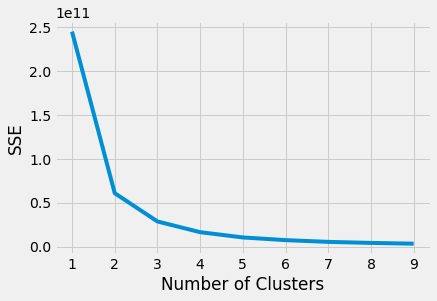

In [21]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 10), sse) 
plt.xticks(range(1, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [22]:
kl = KneeLocator(range(1, 10), sse, 
                 curve="convex", 
                 direction="decreasing")

kl.elbow

3

### <span style=color:darkred>Cantidad de Clusters</span>

In [23]:
clustering = KMeans(n_clusters=kl.elbow,max_iter=300)
clustering.fit(df_scaler)

KMeans(n_clusters=3)

In [24]:
clustering.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [29]:
df['Kmeans_Clustering']= clustering.labels_
df_scaler['Kmeans_Clustering']= clustering.labels_
df.to_csv('.\\clusters\\df_rendiment.csv')
df.head()

,id,type_x,type_le,Redimiento,rarity,amount_eth,adj_close,Num_venta,3D Glasses,Bandana,...,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair,Wild White Hair,Kmeans_Clustering
0,1,Male,3,0.011607,0.000153,0.097117,0.995199,0.003237,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1,Male,3,0.011607,0.000153,0.097117,0.995199,0.003237,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,1,Male,3,0.257115,0.000541,0.177450,0.949914,0.005724,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,1,Male,3,0.257115,0.000541,0.177450,0.949914,0.005724,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,1,Male,3,0.000000,0.000347,0.001540,0.999992,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


### <span style=color:darkred>Cantidad de Clusters</span>

In [30]:
pca = PCA(n_components=2)

In [31]:
pca_df = pca.fit_transform (df_scaler)

In [32]:
pca_df

array([[ 5.50530674e+03, -7.53144355e-01],
       [ 5.50530674e+03, -7.53144309e-01],
       [ 5.50530674e+03, -7.53293950e-01],
       ...,
       [-4.49169331e+03, -3.64358699e-01],
       [-4.49169331e+03, -3.64358676e-01],
       [-4.49169331e+03, -3.64358684e-01]])

In [33]:
pca_df_df = pd.DataFrame(pca_df, columns=['componente1', 'componente2'])
pca_df_df

,componente1,componente2
0,5505.306735,-0.753144
1,5505.306735,-0.753144
2,5505.306735,-0.753294
3,5505.306735,-0.753294
4,5505.306735,-0.753003
...,...,...
34850,-4491.693312,-0.364362
34851,-4491.693312,-0.364362
34852,-4491.693312,-0.364359
34853,-4491.693312,-0.364359


In [36]:
pca_df_df['Kmeans_Clustering']= clustering.labels_
pca_df_df
pca_df_df.to_csv('.\\clusters\\df_pca_rendiment.csv')

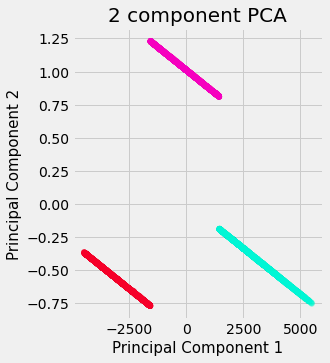

In [37]:
fig = plt.figure(figsize=(4,5))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(x = pca_df_df.componente1, y= pca_df_df.componente2,
          c = pca_df_df.Kmeans_Clustering , edgecolor='none', alpha=0.1,
           cmap=plt.cm.get_cmap('gist_rainbow', 10))

### <span style=color:darkred>Evaulació</span>

In [38]:
silhouette_score(df_scaler, clustering.labels_).round(4)

0.5828

In [39]:
# Instantiate k-means and dbscan algorithms
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features

dbscan.fit(X)

# Compute the silhouette scores for each algorithm
dbscan_silhouette = silhouette_score(X, dbscan.labels_).round (2)

#kmeans_silhoutte = silhouette_score(x, y)

In [40]:
dbscan_silhouette

0.48

In [41]:
df

,id,type_x,type_le,Redimiento,rarity,amount_eth,adj_close,Num_venta,3D Glasses,Bandana,...,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair,Wild White Hair,Kmeans_Clustering
0,1,Male,3,0.011607,0.000153,0.097117,0.995199,0.003237,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1
1,1,Male,3,0.011607,0.000153,0.097117,0.995199,0.003237,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1
2,1,Male,3,0.257115,0.000541,0.177450,0.949914,0.005724,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1
3,1,Male,3,0.257115,0.000541,0.177450,0.949914,0.005724,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1
4,1,Male,3,0.000000,0.000347,0.001540,0.999992,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34850,9998,Female,2,0.003710,0.000034,0.024107,0.999702,0.000634,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
34851,9998,Female,2,0.003710,0.000034,0.024107,0.999702,0.000634,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
34852,9998,Female,2,0.000000,0.000079,0.021968,0.999758,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001465,0
34853,9998,Female,2,0.000000,0.000079,0.021968,0.999758,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0


## <span style=color:darkblue>DataFrame  top 1000 moviments finanacers</span>

In [42]:
df = pd.read_csv('.\\datasets_definitius\\df_finance_attributs_top_1000.csv')

In [43]:
df = df.drop(['Unnamed: 0'], axis=1)

In [261]:
df.describe()

,id2,rarity,amount_eth,adj_close,Num_venta,Redimiento,Year,Month,YearMonth,idpunks,...,Tassle Hat,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair,Wild White Hair
count,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,...,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000
mean,5604.690081,0.081188,26.501710,1370.327419,1.077199,54.983176,2020.218133,4.531867,15.528501,5604.690081,...,0.006284,0.004488,0.009201,0.015934,0.012567,0.011445,0.004937,0.003815,0.012792,0.006508
std,2733.407392,0.044071,73.036522,965.114751,1.403174,702.299233,1.233099,2.876644,8.254596,2733.407392,...,0.079029,0.066852,0.095491,0.125233,0.111410,0.106380,0.070099,0.061655,0.112387,0.080419
min,89.000000,0.000525,0.010000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,89.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3384.000000,0.056481,1.650000,332.393250,0.000000,0.000000,2020.000000,2.000000,9.000000,3384.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5883.000000,0.067217,18.880000,1660.910000,1.000000,0.815257,2021.000000,4.000000,15.000000,5883.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8015.000000,0.108202,35.000000,1937.450000,2.000000,2.093009,2021.000000,6.000000,22.000000,8015.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9997.000000,0.681778,4200.000000,4168.700000,11.000000,25195.513196,2021.000000,12.000000,31.000000,9997.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [262]:
df

,id2,type_x,rarity,amount_eth,adj_close,Num_venta,Redimiento,Year,Month,YearMonth,...,Tassle Hat,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair,Wild White Hair
0,89,Female,0.014377,19.99,353.362,2,1.606553,2020,9,6,...,0,0,0,0,0,0,0,0,0,0
1,89,Female,0.014377,20.00,219.840,1,12.701670,2020,5,28,...,0,0,0,0,0,0,0,0,0,0
2,89,Female,0.014377,1.50,230.774,0,0.000000,2017,7,12,...,0,0,0,0,0,0,0,0,0,0
3,143,Male,0.017581,165.00,1854.560,1,291.890113,2021,3,14,...,0,0,0,0,0,0,0,0,0,0
4,143,Male,0.017581,165.00,1854.560,1,291.890113,2021,3,14,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4451,9971,Female,0.062378,24.00,1781.990,0,0.000000,2021,2,22,...,0,0,0,0,0,0,0,0,0,0
4452,9971,Female,0.062378,24.00,1781.990,0,0.000000,2021,2,22,...,0,0,0,0,0,0,0,0,0,0
4453,9971,Female,0.062378,24.00,1781.990,0,0.000000,2021,2,22,...,0,0,0,0,0,0,0,0,0,0
4454,9997,Zombie,0.008606,99.99,1746.620,0,0.000000,2021,2,8,...,0,0,0,0,0,0,0,0,0,0


### <span style=color:darkred>labelencoder</span>

In [264]:
labelencoder = LabelEncoder()

In [265]:
df['type_le'] = labelencoder.fit_transform(df['type_x'])

In [266]:
#Reorganizar columans DataFrame
df = df[['id2',
 'type_x',
 'type_le',
'Redimiento',
 'rarity',
 'amount_eth',
 'adj_close',
 'Num_venta',
 '3D Glasses',
 'Bandana',
 'Beanie',
 'Big Beard',
 'Big Shades',
 'Black Lipstick',
 'Blonde Bob',
 'Blonde Short',
 'Blue Eye Shadow',
 'Buck Teeth',
 'Cap',
 'Cap Forward',
 'Chinstrap',
 'Choker',
 'Cigarette',
 'Classic Shades',
 'Clown Eyes Blue',
 'Clown Eyes Green',
 'Clown Hair Green',
 'Clown Nose',
 'Cowboy Hat',
 'Crazy Hair',
 'Dark Hair',
 'Do-rag',
 'Earring',
 'Eye Mask',
 'Eye Patch',
 'Fedora',
 'Front Beard',
 'Front Beard Dark',
 'Frown',
 'Frumpy Hair',
 'Goat',
 'Gold Chain',
 'Green Eye Shadow',
 'Half Shaved',
 'Handlebars',
 'Headband',
 'Hoodie',
 'Horned Rim Glasses',
 'Hot Lipstick',
 'Knitted Cap',
 'Luxurious Beard',
 'Medical Mask',
 'Messy Hair',
 'Mohawk',
 'Mohawk Dark',
 'Mohawk Thin',
 'Mole',
 'Mustache',
 'Muttonchops',
 'Nerd Glasses',
 'Normal Beard',
 'Normal Beard Black',
 'Orange Side',
 'Peak Spike',
 'Pigtails',
 'Pilot Helmet',
 'Pink With Hat',
 'Pipe',
 'Police Cap',
 'Purple Eye Shadow',
 'Purple Hair',
 'Purple Lipstick',
 'Red Mohawk',
 'Regular Shades',
 'Rosy Cheeks',
 'Shadow Beard',
 'Shaved Head',
 'Silver Chain',
 'Small Shades',
 'Smile',
 'Spots',
 'Straight Hair',
 'Straight Hair Blonde',
 'Straight Hair Dark',
 'Stringy Hair',
 'Tassle Hat',
 'Tiara',
 'Top Hat',
 'VR',
 'Vampire Hair',
 'Vape',
 'Welding Goggles',
 'Wild Blonde',
 'Wild Hair',
 'Wild White Hair']]

### <span style=color:darkred>Normalitzar les dades</span>

In [267]:
df.type_le.unique()

array([2, 3, 4, 1, 0])

In [268]:
df

,id2,type_x,type_le,Redimiento,rarity,amount_eth,adj_close,Num_venta,3D Glasses,Bandana,...,Tassle Hat,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair,Wild White Hair
0,89,Female,2,1.606553,0.014377,19.99,353.362,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,89,Female,2,12.701670,0.014377,20.00,219.840,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,89,Female,2,0.000000,0.014377,1.50,230.774,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,143,Male,3,291.890113,0.017581,165.00,1854.560,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,143,Male,3,291.890113,0.017581,165.00,1854.560,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4451,9971,Female,2,0.000000,0.062378,24.00,1781.990,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4452,9971,Female,2,0.000000,0.062378,24.00,1781.990,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4453,9971,Female,2,0.000000,0.062378,24.00,1781.990,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4454,9997,Zombie,4,0.000000,0.008606,99.99,1746.620,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [269]:
#df = df.drop(['Year','Month','YearMonth','type_x','type_y','idpunks','accesories2','Unnamed: 14'],axis=1)

In [270]:
# quitamos las columans que ya estan normalizadas como type_le y id
df.iloc[ : , 3:95]

,Redimiento,rarity,amount_eth,adj_close,Num_venta,3D Glasses,Bandana,Beanie,Big Beard,Big Shades,...,Tassle Hat,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair,Wild White Hair
0,1.606553,0.014377,19.99,353.362,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12.701670,0.014377,20.00,219.840,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,0.014377,1.50,230.774,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,291.890113,0.017581,165.00,1854.560,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,291.890113,0.017581,165.00,1854.560,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4451,0.000000,0.062378,24.00,1781.990,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4452,0.000000,0.062378,24.00,1781.990,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4453,0.000000,0.062378,24.00,1781.990,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4454,0.000000,0.008606,99.99,1746.620,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [271]:
df_scaler = pd.DataFrame(df)

In [272]:
scalerN = Normalizer()

In [273]:
#Normalitzem les variable numeriques
df_scaler.iloc[ : , 3:95]= scalerN.fit_transform(df_scaler.iloc[ : , 3:95])

In [274]:
df_scaler = df_scaler.drop(['type_x'],axis=1)
df_scaler

,id2,type_le,Redimiento,rarity,amount_eth,adj_close,Num_venta,3D Glasses,Bandana,Beanie,...,Tassle Hat,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair,Wild White Hair
0,89,2,0.004539,0.000041,0.056479,0.998373,0.005651,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,89,2,0.057443,0.000065,0.090450,0.994222,0.004522,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,89,2,0.000000,0.000062,0.006500,0.999969,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,143,3,0.154879,0.000009,0.087550,0.984046,0.000531,0.0,0.0,0.000531,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,143,3,0.154879,0.000009,0.087550,0.984046,0.000531,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4451,9971,2,0.000000,0.000035,0.013467,0.999909,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4452,9971,2,0.000000,0.000035,0.013467,0.999909,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4453,9971,2,0.000000,0.000035,0.013467,0.999909,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4454,9997,4,0.000000,0.000005,0.057154,0.998365,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [275]:
y =  np.array(df_scaler.iloc[ : ,2:3])
y

array([[0.00453909],
       [0.05744307],
       [0.        ],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

In [276]:
df_scaler = df_scaler.drop(['Redimiento'],axis= 1)
df_scaler

,id2,type_le,rarity,amount_eth,adj_close,Num_venta,3D Glasses,Bandana,Beanie,Big Beard,...,Tassle Hat,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair,Wild White Hair
0,89,2,0.000041,0.056479,0.998373,0.005651,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,89,2,0.000065,0.090450,0.994222,0.004522,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,89,2,0.000062,0.006500,0.999969,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,143,3,0.000009,0.087550,0.984046,0.000531,0.0,0.0,0.000531,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,143,3,0.000009,0.087550,0.984046,0.000531,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4451,9971,2,0.000035,0.013467,0.999909,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4452,9971,2,0.000035,0.013467,0.999909,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4453,9971,2,0.000035,0.013467,0.999909,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4454,9997,4,0.000005,0.057154,0.998365,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [277]:
X = np.array(df_scaler.iloc[ : , 0:93])
X

array([[8.90000000e+01, 2.00000000e+00, 4.06195798e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.90000000e+01, 2.00000000e+00, 6.50188186e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.90000000e+01, 2.00000000e+00, 6.22962783e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.97100000e+03, 2.00000000e+00, 3.50013937e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99700000e+03, 4.00000000e+00, 4.91927875e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99700000e+03, 4.00000000e+00, 4.91927875e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

### <span style=color:darkred>Cantidad de Clusters</span>

In [278]:
sse = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaler)
    
    sse.append(kmeans.inertia_)

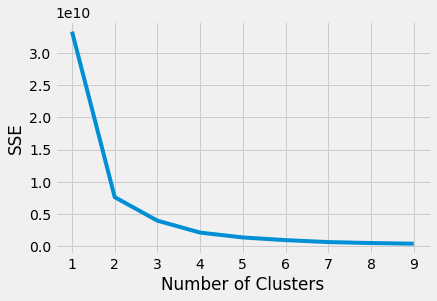

In [279]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 10), sse) 
plt.xticks(range(1, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [280]:
kl = KneeLocator(range(1, 10), sse, 
                 curve="convex", 
                 direction="decreasing")

kl.elbow

2

### <span style=color:darkred>Cantidad de Clusters</span>

In [281]:
clustering = KMeans(n_clusters=kl.elbow,max_iter=300)
clustering.fit(df_scaler)

KMeans(n_clusters=2)

In [282]:
clustering.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [283]:
df['Kmeans_Clustering']= clustering.labels_
df_scaler['Kmeans_Clustering']= clustering.labels_
df.head()

,id2,type_x,type_le,Redimiento,rarity,amount_eth,adj_close,Num_venta,3D Glasses,Bandana,...,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair,Wild White Hair,Kmeans_Clustering
0,89,Female,2,0.004539,0.000041,0.056479,0.998373,0.005651,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,89,Female,2,0.057443,0.000065,0.090450,0.994222,0.004522,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,89,Female,2,0.000000,0.000062,0.006500,0.999969,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,143,Male,3,0.154879,0.000009,0.087550,0.984046,0.000531,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,143,Male,3,0.154879,0.000009,0.087550,0.984046,0.000531,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


### <span style=color:darkred>Cantidad de Clusters</span>

In [284]:
pca = PCA(n_components=2)

In [285]:
pca_df = pca.fit_transform (df_scaler)

In [286]:
pca_df

array([[ 5.51569010e+03,  6.52153561e-01],
       [ 5.51569010e+03,  6.52340096e-01],
       [ 5.51569010e+03,  6.51886263e-01],
       ...,
       [-4.36630993e+03,  6.34884473e-01],
       [-4.39230994e+03, -1.35923680e+00],
       [-4.39230994e+03, -1.35923685e+00]])

In [287]:
pca_df_df = pd.DataFrame(pca_df, columns=['componente1', 'componente2'])
pca_df_df

,componente1,componente2
0,5515.690099,0.652154
1,5515.690099,0.652340
2,5515.690099,0.651886
3,5461.690097,-0.345235
4,5461.690097,-0.345234
...,...,...
4451,-4366.309935,0.634885
4452,-4366.309935,0.634885
4453,-4366.309935,0.634884
4454,-4392.309940,-1.359237


In [288]:
pca_df_df['Kmeans_Clustering']= clustering.labels_
pca_df_df

,componente1,componente2,Kmeans_Clustering
0,5515.690099,0.652154,0
1,5515.690099,0.652340,0
2,5515.690099,0.651886,0
3,5461.690097,-0.345235,0
4,5461.690097,-0.345234,0
...,...,...,...
4451,-4366.309935,0.634885,1
4452,-4366.309935,0.634885,1
4453,-4366.309935,0.634884,1
4454,-4392.309940,-1.359237,1


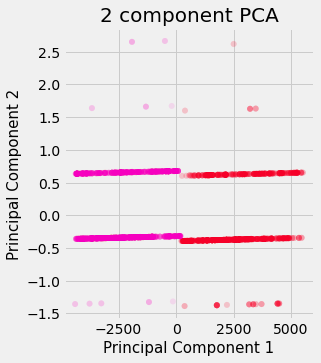

In [289]:
fig = plt.figure(figsize=(4,5))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(x = pca_df_df.componente1, y= pca_df_df.componente2,
          c = pca_df_df.Kmeans_Clustering , edgecolor='none', alpha=0.1,
           cmap=plt.cm.get_cmap('gist_rainbow', 10))

### <span style=color:darkred>Evaulació</span>

In [290]:
silhouette_score(df_scaler, clustering.labels_).round(4)

0.6552

In [291]:
# Instantiate k-means and dbscan algorithms
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features

dbscan.fit(X)

# Compute the silhouette scores for each algorithm
dbscan_silhouette = silhouette_score(X, dbscan.labels_).round (2)

#kmeans_silhoutte = silhouette_score(x, y)

In [292]:
dbscan_silhouette

0.53

In [293]:
df

,id2,type_x,type_le,Redimiento,rarity,amount_eth,adj_close,Num_venta,3D Glasses,Bandana,...,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair,Wild White Hair,Kmeans_Clustering
0,89,Female,2,0.004539,0.000041,0.056479,0.998373,0.005651,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,89,Female,2,0.057443,0.000065,0.090450,0.994222,0.004522,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,89,Female,2,0.000000,0.000062,0.006500,0.999969,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,143,Male,3,0.154879,0.000009,0.087550,0.984046,0.000531,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,143,Male,3,0.154879,0.000009,0.087550,0.984046,0.000531,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4451,9971,Female,2,0.000000,0.000035,0.013467,0.999909,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4452,9971,Female,2,0.000000,0.000035,0.013467,0.999909,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4453,9971,Female,2,0.000000,0.000035,0.013467,0.999909,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4454,9997,Zombie,4,0.000000,0.000005,0.057154,0.998365,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
